# Final Project Notebook: Modeling the Hodgkin-Huxley Equation
## Jessie Lea & Ben Smith

### Introduction:
The Hodgkin-Huxley model is a model created by Alan Lloyd Hodgkin and Andrew Fielding Huxley in 1952. The model was awarded the Nobel Prize in Physiology or Medicine in 1963. The model is a series of differential equations meant to explain the ionic mechanisms used in the propogation of an action potential down an axon. The model treats each biophysical characteristic of the cell membrane as a component of an electrical circuit, as seen in the image below. In the circuit, the lipid bilayer is represented as a capacitance (C<sub>m</sub>). Voltage-gated and leak ion channels are represented by nonlinear (g<sub>n</sub>) and linear (g<sub>L</sub>) conductances, respectively. The electrochemical gradients driving the flow of ions are represented by batteries (E), and ion pumps and exchangers are represented by current sources (I<sub>p</sub>). 
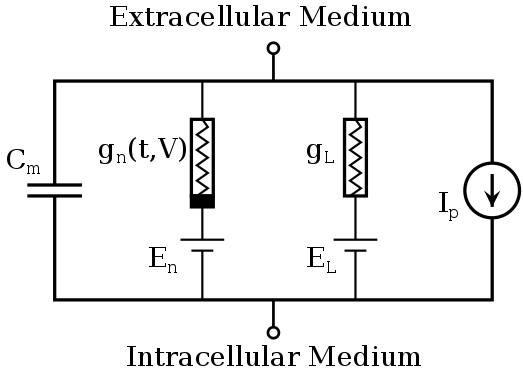

The series of equations used in the model can be seen in the image below.
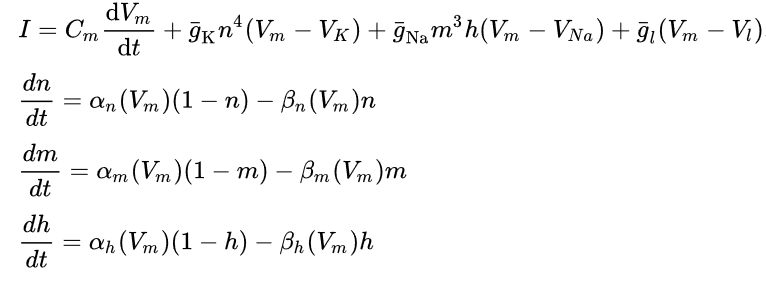

This model remains the most accurate way to describe the effects of cellular components on the propogation of action potentials, and is still used currently to model neurological diseases. As technology continues to improve, the Hodgkin-Huxley model will be used to program digital circuits (FPGAs) and inform neurobiological computational models. Therefore, it is important to be able to code and implement the series of differential equations in a straightforward way with relatively little computing power.

Image of Hodgkin-Huxley based circuit and differential equations are from https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model

### Research Question:
Can we model the Hodgkin-Huxley equation using simple code structure and low computational power?
### Hypothesis:
If we utilize Euler's method to solve the differential equations and create several helper methods to determine individual components of the Hodgkin-Huxley equation, we will be able to create graphs modeling channel probability and voltage with simple code structure.

### Methods and Results:

1. Calculate alpha and beta rates at V = 0
    ``` 
    use a and b rate values to get steady state n, m, h values
    
    use these values in the main equation with constants such as 
    gbarK (at t = 0 and v = 0, dv/dt should = 0)```
2. Set new value for membrane potential (V) <br>
3. Recalculate rate constants with new V <br>
4. Calculate new values for dn/dt, dm/dt, and dh/dt with new rate constants <br>
5. Use Euler's with dn/dt, dm/dt, and dh/dt to solve for n,m, and h. 

$$ n(t + \Delta t) = n(t) + \frac{\delta n}{\delta t} * \Delta t $$

6. Use the new values for n, m, and h to calculate dv/dt in main equation 

$$ \frac {dV}{dt} = \bar{g_k}* n^4(V-V_k) + \bar{g_{Na}} * m^3 * h * (V-V_{Na}) + \bar{g_L} * (V-V_L) $$


7. Calculate new V using dv/dt
$$V(t + \Delta t) = V(t) + \frac{\delta V}{\delta t} * \Delta t$$

8. Store new value of V for plot, reiterate from step 3 with new value of V

In [9]:
import matplotlib.pyplot as plt
import numpy as np
class HH_generic:
    """Class to model the Hodgkin Huxley equation for a generic cell"""
    
    def __init__(self, v = 0, t = 50, delta_t = 0.01):
        """Constructor to create Hodgkin Huxley Cell"""
        self.v = v
        self.delta_t = delta_t
        self.t = t
  
    def alpha_n(self):
        """Calculates alpha n value"""
        alpha_n = 0.01*(self.v + 50)/(1-np.exp(-(self.v + 50)/10))
        return alpha_n
    
    def beta_n(self):
        """Calculates beta n value"""
        beta_n = 0.125*np.exp(-(self.v+60)/80)
        return beta_n
    
    def alpha_m(self):
        """Calculates alpha m value"""
        alpha_m = 0.1*(self.v+35.0)/(1-np.exp(-(self.v+35)/10))
        return alpha_m
    
    def beta_m(self):
        """Calculates beta m value"""
        beta_m = 4.0*np.exp(-0.0556*(self.v+60))
        return beta_m
    
    def alpha_h(self):
        """Calculates alpha h value"""
        alpha_h = 0.07*np.exp(-0.05*(self.v+60))
        return alpha_h
        
    def beta_h(self):
        """Calculates beta h value"""
        beta_h = 1.0/(1+np.exp(-(0.1)*(self.v +30)))
        return beta_h
        
    def steady_n(self):
        """Calculates steady state value for n"""
        s_n = self.alpha_n()/(self.alpha_n() + self.beta_n())
        return s_n
    
    def steady_m(self):
        """Calculates steady state value for m"""
        s_m = self.alpha_m()/(self.alpha_m() + self.beta_m())
        return s_m
    
    def steady_h(self):
        "Calculates steady state value for h"
        s_h = self.alpha_h()/(self.alpha_h() + self.beta_h())
        return s_h
    
    def run_simulation(self): 
        """Runs simulation using Hodgkin Huxley cell"""
        cm = 1.0 #membrane capacitance per unit area
        VNa = 55.17 #sodium reversal potential
        VK = -72.14 #potassium reversal potential
        VL = -49.42 #leak channel reversal potential
        gBNa = 1.20 #sodium conductance
        gBK = 0.36 #potassium conductance
        gBL = 0.003 #leak channel conductance
        n = self.steady_n() 
        m = self.steady_m()
        h = self.steady_h()
        I = 0.1
        v_list = [self.v]
        I_list = []
        n_list = []
        m_list = []
        h_list = []
        for i in range(int(self.t/self.delta_t)): 
            dv_dt = 100*(I - (gBK*n**4*(self.v-VK) + gBNa * m**3 * h * (self.v - VNa) + gBL * (self.v - VL))) 
            self.v = self.v + dv_dt * self.delta_t
            v_list.append(self.v)
            alpha_n = self.alpha_n()
            beta_n = self.beta_n()
            alpha_m = self.alpha_m()
            beta_m = self.beta_m()
            alpha_h = self.alpha_h()
            beta_h = self.beta_h()
            dn_dt = alpha_n*(1-n)-beta_n*n
            dm_dt = alpha_m*(1-m)-beta_m*m
            dh_dt = alpha_h*(1-h)-beta_h*h
            n = n + dn_dt * self.delta_t
            m = m + dm_dt * self.delta_t
            h = h + dh_dt * self.delta_t
            n_list.append(n)
            m_list.append(m)
            h_list.append(h)
            #I = -dv_dt + gBK*n**4*(self.v-VK) + gBNa * m**3 * h * (self.v - VNa) + gBL * (self.v - VL)
            #I_list.append(I)
        #plt.plot(I_list)
        #plt.show()
        plt.plot(n_list, label = 'n') #n, m and h list are used for the first plot
        plt.plot(m_list, label = 'm') 
        plt.plot(h_list, label = 'h')
        plt.xlabel('Time')
        plt.ylabel('Channel Probability')
        plt.legend(loc='upper left')
        plt.show()
        plt.plot(v_list) #second plot, voltage vs time 
        plt.xlabel('Time')
        plt.ylabel('Voltage')
        plt.show()

In [10]:
#creating object to test all methods on
test = HH_generic(v = -60)

In [3]:
#testing n methods
print(test.alpha_n())
print(test.beta_n())

0.05819767068693265
0.125


In [4]:
#testing m methods
print(test.alpha_m())
print(test.beta_m())

0.22356372458463003
4.0


In [5]:
#testing h methods
print(test.alpha_h())
print(test.beta_h())

0.07
0.04742587317756678


In [6]:
#testing steady state methods
print(test.steady_n())
print(test.steady_m())
print(test.steady_h())

0.3176769140606974
0.05293248525724958
0.5961207535084603


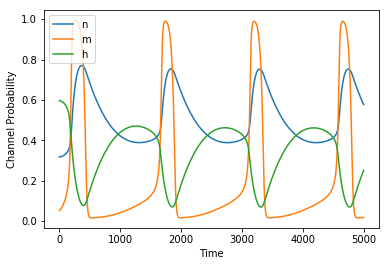

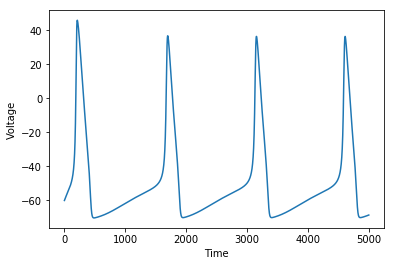

In [12]:
#testing simulation
test.run_simulation()

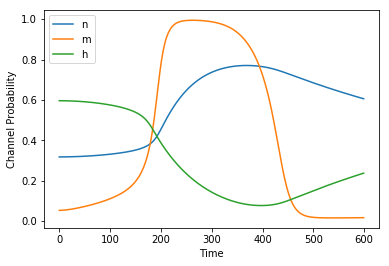

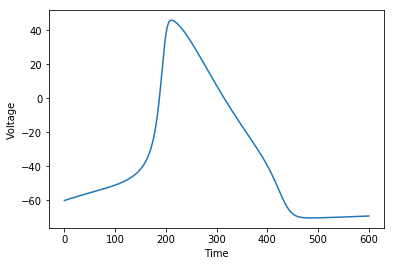

In [11]:
test1 = HH_generic(v = -60, t = 6)
test1.run_simulation()

### Discussion:
While our model is very simple, it is an important step for biological implementation of neuromodulatory devices. There won't be any access to supercomputing and there will be critical time restrictions, so devices meant to regulate action potentials will need to be very small and have a low computational cost (i.e. simple quick methods for approximation of differential equations and not a lot of space for large code). Field programmable gate arrays (integrated circuits with a high degree of flexibility due to their array of programmable logic blocks) are currently being used for spiking neuronal networks yet there are very few examples of digital FPGAs using the HH model that have the most biological viability for integration such as brain machine interfacing (Levi et al. 2017). Thus, foundational research on coding the HH model are necessary to understand its flexibility and feasability for implementation into a programmable circuit before integration into a biological setting. Our model shows that it is relatively straighforward to use Euler's method for solving first order degree differential equations to accurately model a proper action potential and that this can be done with a few lines of code. Further work should focus on A: different numerical methods to approximate the HH model to determine accuracy and efficiency, B: how easily these models can be applied to a digital circuit such as a FPGA, C: how the HH model compares to threshold models such as the Leaky Integrate and Fire (LIF) or the Izhikevich model (IZH) (both require less compuatational effort but do not model a complete physiological state), D: finally implentation into simple biological models (insects, annelids, finally mammals). 

### Sources:
Hodgkin A, Huxley A. A quantitative description of membrane current and its application to conduction and excitation in nerve. Bulletin of Mathematical Biology. 1990;52(1-2):25–71. doi:10.1016/s0092-8240(05)80004-7

Levi T, Khoyratee F, Saïghi S, Ikeuchi Y. Digital implementation of Hodgkin–Huxley neuron model for neurological diseases studies. Artificial Life and Robotics. 2017;23(1):10–14. doi:10.1007/s10015-017-0397-7

How to Solve and Program the Hodgkin - Huxley Equations. insidan.imt.liu.se.